In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("ReidentificationTests.csv")

In [35]:
from Utils.constant import MODELS
from Utils.constant import PLACES

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x), string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)
    probe_places = 'Ayagaures'
    gallery_places = 'ParqueSur'
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    for model in MODELS:
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum["Values"])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAPtop1', 'mAPtop5']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
[ ### Probe: Ayagaures - Gallery: ParqueSur  ###]
VGG-Face
         Metric   mAPtop1   mAPtop5
0        cosine  0.023566  0.024439
1     euclidean  0.017449  0.019163
2  euclidean_l2  0.025976  0.026850
Facenet
         Metric   mAPtop1   mAPtop5
3        cosine  0.008527  0.009750
4     euclidean  0.010608  0.011830
5  euclidean_l2  0.008891  0.010114
OpenFace
       Metric   mAPtop1   mAPtop5
27     cosine  0.008734  0.008734
28  euclidean  0.038574  0.040757


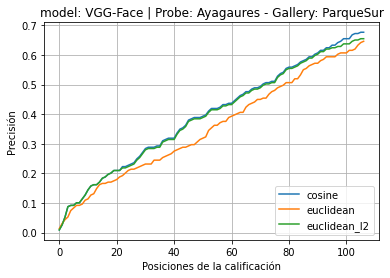

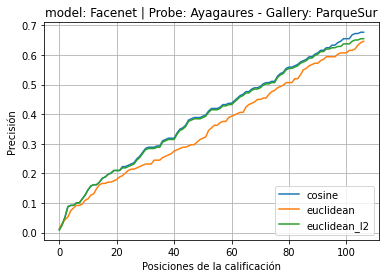

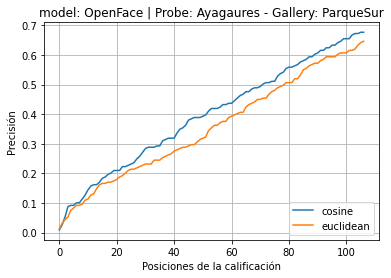

In [36]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace + recorte
[ ### Probe: Ayagaures - Gallery: ParqueSur  ###]
VGG-Face
         Metric   mAPtop1   mAPtop5
6        cosine  0.032755  0.034509
7     euclidean  0.020870  0.022120
8  euclidean_l2  0.035039  0.036793
Facenet
          Metric   mAPtop1   mAPtop5
9         cosine  0.013596  0.016053
10     euclidean  0.016192  0.018648
11  euclidean_l2  0.013596  0.016053
OpenFace
          Metric   mAPtop1   mAPtop5
12        cosine  0.008772  0.008772
13     euclidean  0.030702  0.035088
14  euclidean_l2  0.030702  0.035088


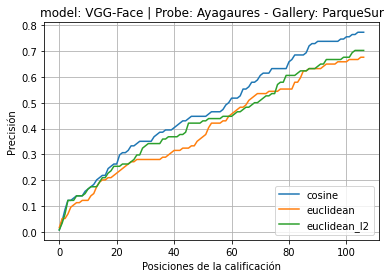

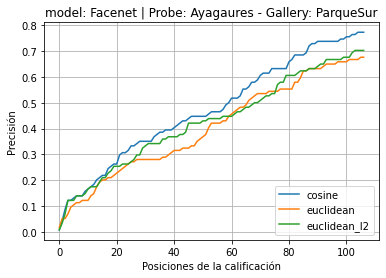

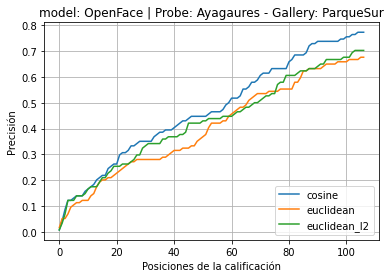

In [37]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

Img2pose
[ ### Probe: Ayagaures - Gallery: ParqueSur  ###]
VGG-Face
          Metric   mAPtop1   mAPtop5
15        cosine  0.021522  0.021522
16     euclidean  0.024356  0.028557
17  euclidean_l2  0.024243  0.024243
Facenet
          Metric   mAPtop1   mAPtop5
18        cosine  0.007419  0.007419
19     euclidean  0.007611  0.007611
20  euclidean_l2  0.007419  0.007419
OpenFace
          Metric   mAPtop1   mAPtop5
21        cosine  0.004065  0.004065
22     euclidean  0.026829  0.026829
23  euclidean_l2  0.026829  0.026829


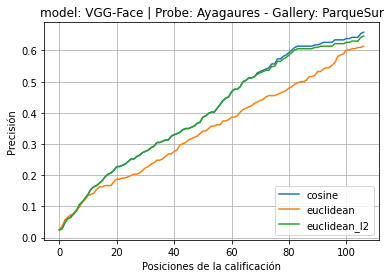

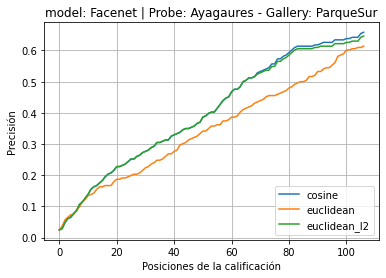

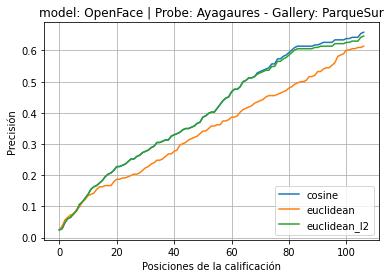

In [38]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose + recorte de imagenes
[ ### Probe: Ayagaures - Gallery: ParqueSur  ###]
VGG-Face
          Metric   mAPtop1   mAPtop5
24        cosine  0.027236  0.027236
25     euclidean  0.029336  0.033401
26  euclidean_l2  0.032678  0.032678
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


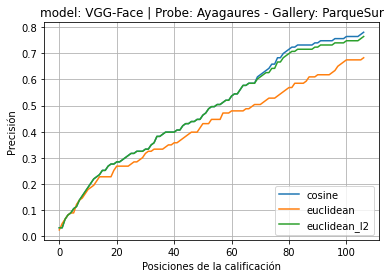

In [39]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

In [40]:
from sklearn.metrics import average_precision_score

def calculateAveragePrecision(dorsalList: list, query: int) -> tuple:
        averagePrecision = []
        count = 0
        print(dorsalList)
        for index, dorsal in enumerate(dorsalList):
            if dorsal == query:
                count += 1
                averagePrecision.append(count / (index + 1))
            else:
                averagePrecision.append(0)

        return averagePrecision[0], sum(averagePrecision)

dorsal = 1
dorsalList = [1,0,1,2,2,3,2,1,4,5,6,7]
countTP = 1 / dorsalList.count(dorsal)
res = calculateAveragePrecision(dorsalList[0:5], dorsal)
print(countTP * res[0])
print(countTP * res[1])


print(average_precision_score())

[1, 0, 1, 2, 2]
0.3333333333333333
0.5555555555555555


TypeError: average_precision_score() missing 2 required positional arguments: 'y_true' and 'y_score'